# Part A: Plant Seedlings Classification (12 Species)

In [2]:
# Required libraries
import os
import zipfile
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
# Part A - Q1 A: Extract zip file
zip_path = 'plant-seedlings-classification.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('plant-seedlings-classification')

In [4]:
import os

# Check if the directory exists
image_dir = 'plant-seedlings-classification/plant-seedlings-classification/train'
print(os.path.exists(image_dir))  # Should print True if the path is correct

True


In [5]:
# Part A - Q1 B: Map images to labels and form DataFrame
image_dir = 'plant-seedlings-classification/plant-seedlings-classification/train'

# Now iterate over the files in the correct path
data = []
for label in os.listdir(image_dir):
    label_dir = os.path.join(image_dir, label)
    if os.path.isdir(label_dir):
        for img_file in os.listdir(label_dir):
            data.append((img_file, label, os.path.join(label_dir, img_file)))

# Create DataFrame
df = pd.DataFrame(data, columns=['Image_Name', 'Species', 'Image_Path'])
print(df.head())

      Image_Name      Species  \
0  0050f38b3.png  Black-grass   
1  0183fdf68.png  Black-grass   
2  0260cffa8.png  Black-grass   
3  05eedce4d.png  Black-grass   
4  075d004bc.png  Black-grass   

                                          Image_Path  
0  plant-seedlings-classification/plant-seedlings...  
1  plant-seedlings-classification/plant-seedlings...  
2  plant-seedlings-classification/plant-seedlings...  
3  plant-seedlings-classification/plant-seedlings...  
4  plant-seedlings-classification/plant-seedlings...  


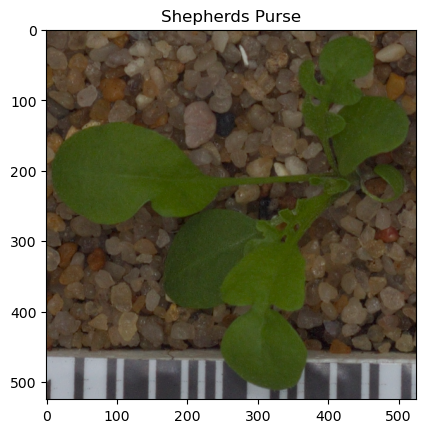

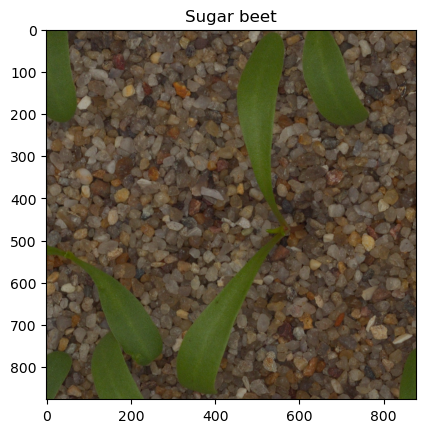

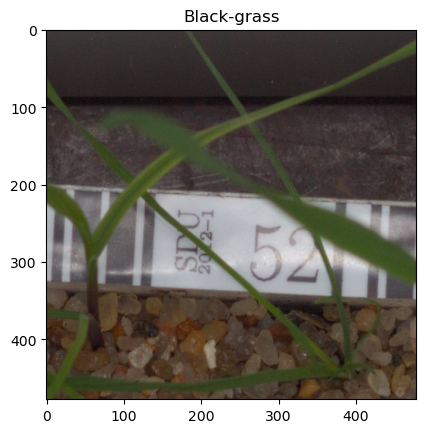

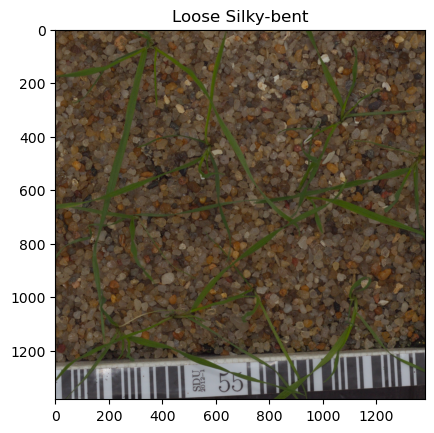

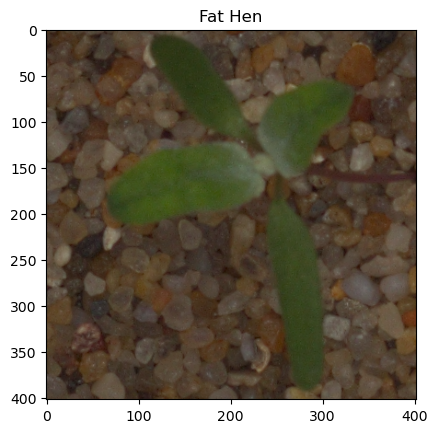

In [6]:
# Part A - Q1 C: Function to select n random images and display
def display_random_images(n):
    random_samples = df.sample(n)
    for i, row in random_samples.iterrows():
        img = Image.open(row['Image_Path'])
        plt.imshow(img)
        plt.title(row['Species'])
        plt.show()

# Example usage
display_random_images(5)

In [7]:
from PIL import Image

# Part A - Q2 A: Create X and Y from DataFrame
X = np.array([np.array(Image.open(img_path).resize((128, 128)).convert('RGB')) for img_path in df['Image_Path']])
Y = df['Species'].values

In [8]:
# Part A - Q2 B: Encode labels
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

In [9]:
# Part A - Q2 C: Unify image shapes (already done by resizing in X)
X = np.array([img.reshape((128, 128, 3)) for img in X])

In [10]:
# Part A - Q2 D: Normalize images
X = X / 255.0

In [11]:
# Part A - Q3 A: Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [12]:
# Part A - Q3 B: CNN architecture
model = models.Sequential()
model.add(layers.Input(shape=(128, 128, 3)))  # Define the input layer first
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(le.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Part A - Q3 C: Train the model
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test)) #Using 5 epochs for demonstration

Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.1740 - loss: 2.3824 - val_accuracy: 0.3926 - val_loss: 1.7513
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.4348 - loss: 1.6122 - val_accuracy: 0.5558 - val_loss: 1.2359
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.6352 - loss: 1.0740 - val_accuracy: 0.6758 - val_loss: 0.9577
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.6935 - loss: 0.8970 - val_accuracy: 0.7084 - val_loss: 0.8744
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.7616 - loss: 0.7100 - val_accuracy: 0.6463 - val_loss: 1.0361


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


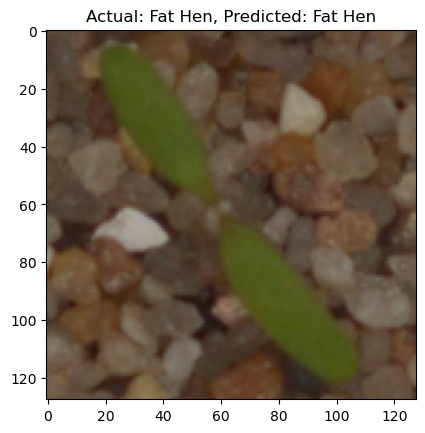

In [14]:
# Part A - Q3 D: Predict random image label
def predict_random_image():
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx]
    actual_label = le.inverse_transform([Y_test[idx]])[0]
    predicted_label = le.inverse_transform([np.argmax(model.predict(np.array([img])))])[0]
    plt.imshow(img)
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.show()

# Example usage
predict_random_image()

# Part B: Flower Classification (17 Species)

NOTE: I am using Oxford Flowers 102 dataset, since in new Tensorflow Oxford Flowers 17 dataset is not available. 

In [17]:
# Part 1A: Import and read Oxford Flowers 102 dataset and split into X and Y while loading.

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset with images resized to (224, 224)
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Prepare lists to hold images and labels
images = []
labels = []

# Function to resize images
def resize_image(image, label):
    image = tf.image.resize(image, (224, 224))
    return image, label

# Apply resizing to the dataset
dataset = dataset['train'].map(resize_image)

# Convert the dataset to NumPy arrays
for image, label in tfds.as_numpy(dataset):
    images.append(image)
    labels.append(label)

# Convert lists to NumPy arrays
X = np.array(images)
Y = np.array(labels)

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y, num_classes=102)

In [18]:
# Part 1B: Print number of images and shape of the images.

print("Number of images:", X.shape[0])
print("Shape of each image:", X.shape[1:])

Number of images: 1020
Shape of each image: (224, 224, 3)


In [19]:
# Part 1C: Print count of each class from Y.

# Convert one-hot encoded labels to class labels
labels_indices = np.argmax(Y, axis=1)

# Count the occurrences of each class
unique, counts = np.unique(labels_indices, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Count of each class:")
for cls, cnt in class_counts.items():
    print(f"Class {cls}: {cnt} images")

Count of each class:
Class 0: 10 images
Class 1: 10 images
Class 2: 10 images
Class 3: 10 images
Class 4: 10 images
Class 5: 10 images
Class 6: 10 images
Class 7: 10 images
Class 8: 10 images
Class 9: 10 images
Class 10: 10 images
Class 11: 10 images
Class 12: 10 images
Class 13: 10 images
Class 14: 10 images
Class 15: 10 images
Class 16: 10 images
Class 17: 10 images
Class 18: 10 images
Class 19: 10 images
Class 20: 10 images
Class 21: 10 images
Class 22: 10 images
Class 23: 10 images
Class 24: 10 images
Class 25: 10 images
Class 26: 10 images
Class 27: 10 images
Class 28: 10 images
Class 29: 10 images
Class 30: 10 images
Class 31: 10 images
Class 32: 10 images
Class 33: 10 images
Class 34: 10 images
Class 35: 10 images
Class 36: 10 images
Class 37: 10 images
Class 38: 10 images
Class 39: 10 images
Class 40: 10 images
Class 41: 10 images
Class 42: 10 images
Class 43: 10 images
Class 44: 10 images
Class 45: 10 images
Class 46: 10 images
Class 47: 10 images
Class 48: 10 images
Class 49:

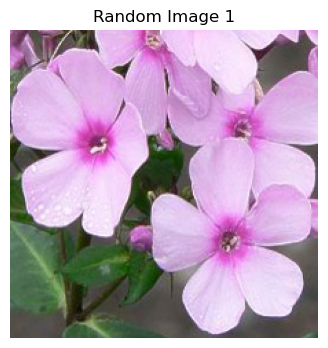

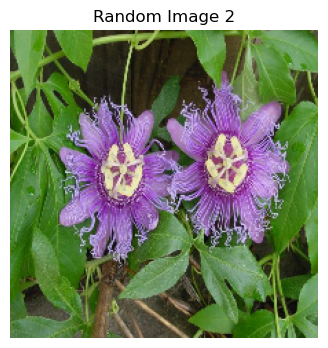

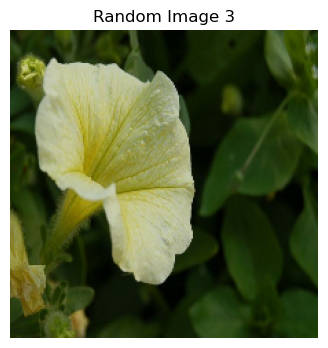

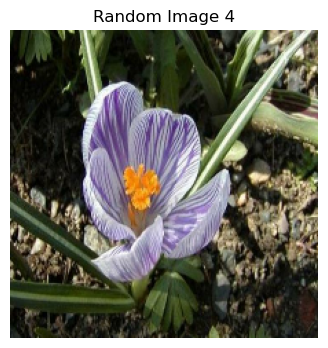

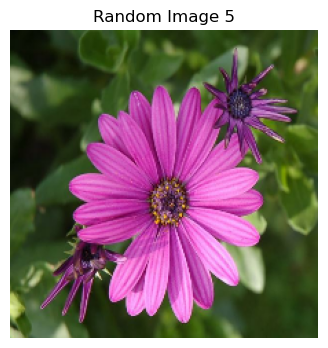

In [20]:
# Part 2A: Display 5 random images.

import random
%matplotlib inline

# Select 5 random indices
indices = random.sample(range(X.shape[0]), 5)

# Display the images
for i, idx in enumerate(indices):
    plt.figure(figsize=(4, 4))
    plt.imshow(X[idx].astype('uint8'))
    plt.title(f"Random Image {i+1}")
    plt.axis('off')
    plt.show()

In [21]:
# Part 2B: Select any image from the dataset and assign it to a variable.

# Select the first image
image = X[0]

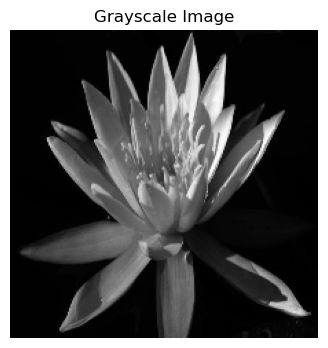

In [22]:
# Part 2C: Transform the image into grayscale format and display the same.

from skimage.color import rgb2gray

# Transform the image to grayscale
gray_image = rgb2gray(image)

# Display the grayscale image
plt.figure(figsize=(4, 4))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

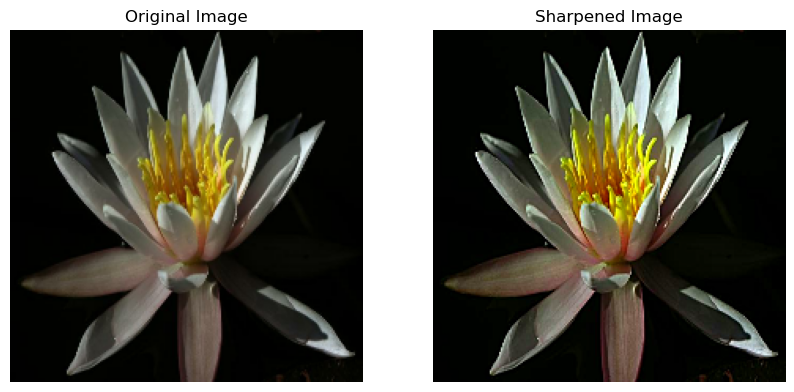

In [23]:
# Part 2D: Apply a filter to sharpen the image and display before and after sharpening.

from skimage.filters import unsharp_mask

# Normalize the image
image_normalized = image / 255.0

# Apply sharpening filter
sharpened_image = unsharp_mask(image_normalized, radius=1, amount=1)

# Display original and sharpened images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image.astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

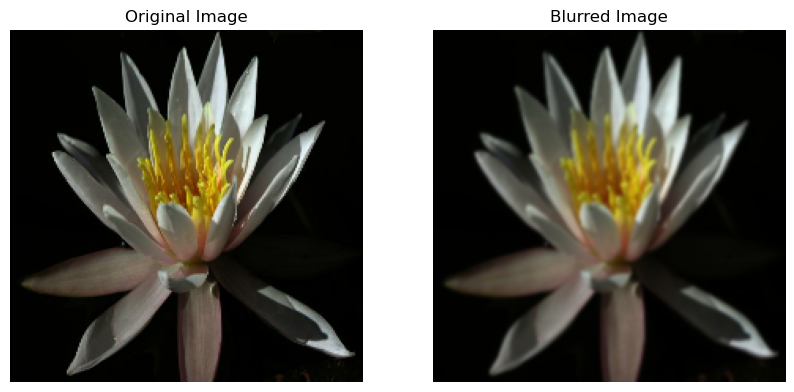

In [24]:
# Part 2E: Apply a filter to blur the image and display before and after blur.

from skimage.filters import gaussian

# Apply Gaussian blur
blurred_image = gaussian(image_normalized, sigma=1, channel_axis=-1)

# Display original and blurred images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image.astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.show()

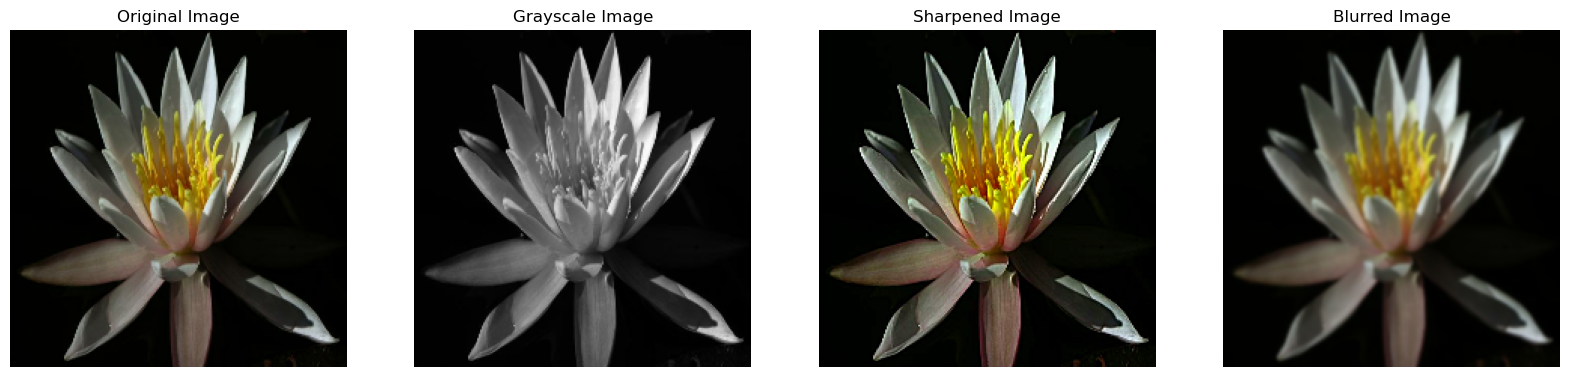

In [25]:
# Part 2F: Display all the 4 images from above besides each other.

plt.figure(figsize=(20, 5))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(image.astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Grayscale image
plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 4, 3)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 4, 4)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.show()

In [26]:
# Part 3A: Split the data into train and test with 80:20 proportion.

from sklearn.model_selection import train_test_split

# Normalize the images (already normalized in previous steps)
X_normalized = X / 255.0

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_normalized, Y, test_size=0.2, random_state=42)

In [27]:
# Part 3B: Train a model using any Supervised Learning algorithm and share performance metrics on test data.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier
clf.fit(X_train_flat, np.argmax(Y_train, axis=1))

# Predict on test data
Y_pred = clf.predict(X_test_flat)

# Evaluate the model
print("Classification Report:")
print(classification_report(np.argmax(Y_test, axis=1), Y_pred))

print("Accuracy:", accuracy_score(np.argmax(Y_test, axis=1), Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.50      0.33      0.40         3
          10       0.00      0.00      0.00         3
          11       0.14      1.00      0.25         1
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         1
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

In [28]:
# Part 3C: Train a model using Neural Network and share performance metrics on test data.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))  # Flatten the input
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(102, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=5,
                    batch_size=32, validation_data=(X_test, Y_test)) #Using 5 epochs for demonstration

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy}")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.0103 - loss: 77.9584 - val_accuracy: 0.0098 - val_loss: 24.3080
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.0130 - loss: 17.6439 - val_accuracy: 0.0196 - val_loss: 6.6491
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.0297 - loss: 5.1659 - val_accuracy: 0.0343 - val_loss: 4.6537
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.0739 - loss: 4.3256 - val_accuracy: 0.0196 - val_loss: 4.9313
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - accuracy: 0.0662 - loss: 4.2449 - val_accuracy: 0.0098 - val_loss: 4.8225
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0095 - loss: 4.8617  
Test Accuracy: 0.009803921915590763


In [29]:
# Part 3D: Train a model using a basic CNN and share performance metrics on test data.

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Define the CNN model
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu',
                     input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(102, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train, Y_train, epochs=5,
                            batch_size=32, validation_data=(X_test, Y_test)) #Using 5 epochs for demonstration

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy}")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 511ms/step - accuracy: 0.0034 - loss: 4.8589 - val_accuracy: 0.0098 - val_loss: 4.5792
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 500ms/step - accuracy: 0.0336 - loss: 4.4774 - val_accuracy: 0.0196 - val_loss: 4.4862
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step - accuracy: 0.0558 - loss: 4.2980 - val_accuracy: 0.0196 - val_loss: 4.3401
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 504ms/step - accuracy: 0.0894 - loss: 3.9777 - val_accuracy: 0.0343 - val_loss: 4.3096
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 506ms/step - accuracy: 0.2294 - loss: 3.3916 - val_accuracy: 0.0588 - val_loss: 4.2190
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0702 - loss: 4.1789
Test Accuracy: 0.05882352963089943


In [30]:
# Part 3E: Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'Prediction.jpg'  # Ensure this image is in your working directory
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array
img_array = image.img_to_array(img)

# Normalize the image
img_array /= 255.0

# Expand dimensions to match input shape
img_array = np.expand_dims(img_array, axis=0)

# Predict the class using the best performing model (assuming CNN)
prediction = cnn_model.predict(img_array)

# Get the predicted class index
predicted_class = np.argmax(prediction, axis=1)[0]

print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: 72
